<a href="https://colab.research.google.com/github/shyamjith94/Machine-Learning-Regression/blob/main/SimpleLinearReression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 46kB/s 
     |████████████████████████████████| 327kB 54.6MB/s 
     |████████████████████████████████| 3.4MB 38.0MB/s 
     |████████████████████████████████| 86.4MB 52kB/s 
     |████████████████████████████████| 450kB 54.7MB/s 
     |████████████████████████████████| 3.8MB 48.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320848 sha256=3aa52336fefb687f0682f6e180998fa0ff70628576e2c56ca7b6f2a80a9b9518
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=a9fc2e8f9da4053bccc7208cab49932b99b48de5553fa3ef26fc564b24ead8e1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, 

In [2]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
data = tc.SFrame.read_csv("/content/drive/My Drive/Machine Learning: Regression/Data/1/c_kc_house_data.csv/kc_house_data.csv")

Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/1/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 100 lines in 3.99147 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/1/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.087426 secs.

In [4]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


In [5]:
data.tail()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7852140040,20140825T000000,507250.0,3,2.5,2270,5536,2.0,0,0
9834201367,20150126T000000,429000.0,3,2.0,1490,1126,3.0,0,0
3448900210,20141014T000000,610685.0,4,2.5,2520,6023,2.0,0,0
7936000429,20150326T000000,1007500.0,4,3.5,3510,7200,2.0,0,0
2997800021,20150219T000000,475000.0,3,2.5,1310,1294,2.0,0,0
263000018,20140521T000000,360000.0,3,2.5,1530,1131,3.0,0,0
6600060120,20150223T000000,400000.0,4,2.5,2310,5813,2.0,0,0
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0
291310100,20150116T000000,400000.0,3,2.5,1600,2388,2.0,0,0
1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0


In [7]:
data.show()

Materializing SFrame

In [10]:
data.column_names()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Text(0.5, 0, 'Sqft Living')

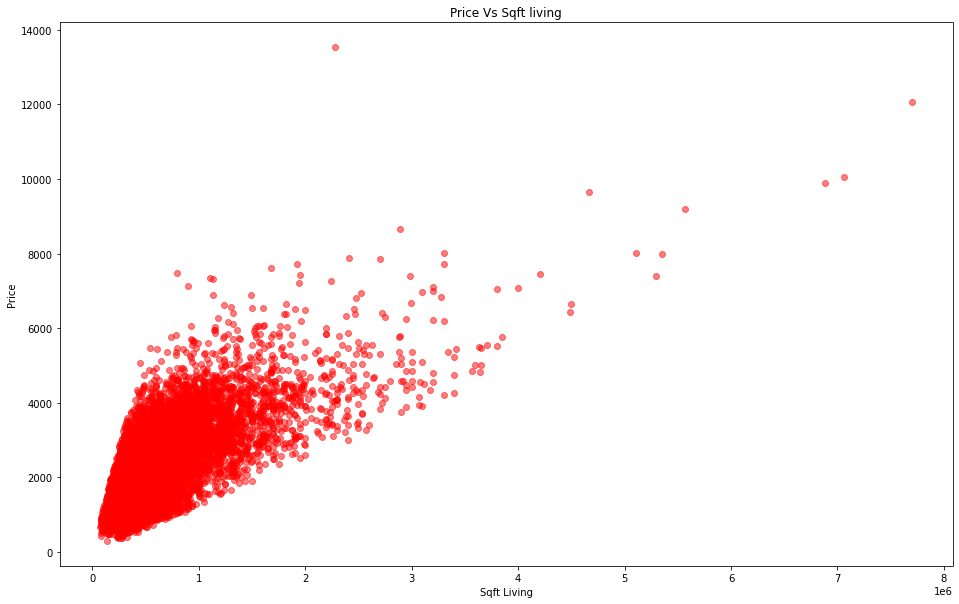

In [33]:
plt.figure(figsize=(16,10))
plt.title("Price Vs Sqft living")
plt.scatter(data["price"], data["sqft_living"], c="red", alpha=0.5)
plt.ylabel("Price")
plt.xlabel("Sqft Living")

In [41]:
def linear_regression(inputs:tc.SFrame, outputs:tc.SFrame):
    """
    Calculate intercept and slope for linear regression and
    return intercept and slope
    input is sqft of living
    output is price of house
    """
    sum_input = inputs.sum()
    sum_output = outputs.sum()
    
    # calculate of product input and output sum
    product_input_output = inputs*outputs
    sum_product = product_input_output.sum()

    # claculating squared values of inputs
    squred_inputs = inputs* inputs
    sum_squares_input = squred_inputs.sum()

    n = float(len(inputs))
    numerator = sum_product - (1./n) * sum_input * sum_output
    denominator = sum_squares_input - (1./n) * sum_input * sum_input

    # calculating slope
    slope = numerator / denominator

    # calculating intercept
    intercept = outputs.mean() - slope * inputs.mean()

    # return values
    return (intercept, slope)




In [17]:
train_data, test_data = data.random_split(.8, seed=0)

In [18]:
train_data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


In [19]:
test_data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0
9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3
1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0
8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0
7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0
2078500320,20140620T000000,605000.0,4,2.5,2620,7553,2.0,0,0
7766200013,20140811T000000,775000.0,4,2.25,4220,24186,1.0,0,0
9478500640,20140819T000000,292500.0,4,2.5,2250,4495,2.0,0,0
9558200045,20140828T000000,289000.0,3,1.75,1260,8400,1.0,0,0
8820901275,20140610T000000,571000.0,4,2.0,2750,7807,1.5,0,0


In [43]:
sqft_intercept, sqft_slope = linear_regression(inputs=train_data["sqft_living"], outputs=train_data["price"])
print("intercept\t :- {}".format(sqft_intercept))
print("slope\t\t :- {}".format(sqft_slope))

intercept	 :- -47116.079072893364
slope		 :- 281.9588396303426


In [42]:
def prediction(inputs, slopes, intercepts):
    """calculating new prediction based sqft of living"""
    # regression method
    predict_value = slopes * inputs + intercepts
    
    # return value
    return predict_value

In [44]:
my_house_sqft = 2650
estimated_price = prediction(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with %d squarefeet is $%.2f\t" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $-124857327.58	


In [55]:
def residual_sum_square(inputs, outputs, intercepts, slopes):
    """Calculating residual sum of square (RSS) """
    # get prediction values
    predicted_values = slopes * inputs + intercepts

    # compute residuals
    residuals = predicted_values - outputs
    
    # square the residuals and sum
    squared_residuals = residuals * residuals
    residuals = squared_residuals.sum()
    return residuals


In [57]:
rss_prices_on_sqft = residual_sum_square(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print('The RSS of predicting Prices based on Square Feet is\t:- ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is	:- 1201918354177280.5


#**Inverse regression predict sqft**

In [60]:
def inverse_regression_predictions(outputs, intercepts, slopes):
    # solve output = intercept + slope*input_feature for input_feature. 
    # Use this equation to compute the inverse predictions:
    estimated_feature = (outputs-intercepts)/slopes
    return estimated_feature

In [62]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print("The estimated squarefeet for a house worth:-\t $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth:-	 $800000.00 is 3004


#**New model estimate prices from bedrooms**

In [64]:
bd_intercept, bd_slope = linear_regression(train_data['bedrooms'], train_data['price'])

print("Intercept:\t" + str(bd_intercept))
print("Slope:\t\t" + str(bd_slope))

Intercept:	109473.17762295902
Slope:		127588.95293398784


In [65]:
# Compute RSS when using bedrooms on TEST data:
print('RSS on test data using bedroom model: {:.3e}'.format(residual_sum_square(test_data['bedrooms'], test_data['price'], bd_intercept, bd_slope)))


RSS on test data using bedroom model: 4.934e+14


In [67]:
# Compute RSS when using squarefeet on TEST data
print('RSS on test data using squarefeet model: {:.3e}'.format(residual_sum_square(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope))
)

RSS on test data using squarefeet model: 2.754e+14
